<h2>
Team leader: Jiaqin Kang<br>
Student ID: 33656491<br>
Team member : Aromal Shiney<br>
student id: 33659221<br>
</h2>

# Part 1: A
<p> The task given was to create a Simple Nearest Neighbour algorithm with Minkowski distance that would successfully classify on the Sonar data and would seperate Rocks from Metals.After classifying the records on the test data, record its precision, accuracy, recall and F1 measure with respect to class "M". The algorithm should be able to produce results for Manhatten Distance and Euclidian Distance based on Minkowski power q.</p>


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('sonar_train.csv')
df2 = pd.read_csv('sonar_test.csv')

<p> The code above creates two dataframes for both training set and test set using the pandas library. These dataframes will be used for data cleaning,preprocessing and building predictive models.</p>

In [2]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
1,0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,...,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.0100,M
2,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
3,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R


In [3]:
df2.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R
1,0.0530,0.0885,0.1997,0.2604,0.3225,0.2247,0.0617,0.2287,0.0950,0.0740,...,0.0244,0.0199,0.0257,0.0082,0.0151,0.0171,0.0146,0.0134,0.0056,M
2,0.0368,0.0279,0.0103,0.0566,0.0759,0.0679,0.0970,0.1473,0.2164,0.2544,...,0.0105,0.0024,0.0018,0.0057,0.0092,0.0009,0.0086,0.0110,0.0052,M
3,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
4,0.0216,0.0124,0.0174,0.0152,0.0608,0.1026,0.1139,0.0877,0.1160,0.0866,...,0.0052,0.0049,0.0096,0.0134,0.0122,0.0047,0.0018,0.0006,0.0023,R


<p> The code blocks above displays the first 5 rows of the training dataset and test data. By displaying the datasets we are able to see the structure of the dataset and the class labels. This code block is particularly useful to ensure that the dataset is loaded correctly.</p>

In [4]:
df.shape

(139, 61)

In [5]:
df2.shape

(69, 61)

<p> The code blocks above checks the shape of both training and test dataset. The code returns the number of rows and columns of each set.</p>

## Data Cleansing and Preprocessing

In [6]:
#check for null values
df.isnull().sum()

A1       0
A2       0
A3       0
A4       0
A5       0
        ..
A57      0
A58      0
A59      0
A60      0
Class    0
Length: 61, dtype: int64

In [7]:
df2.isnull().sum()


A1       0
A2       0
A3       0
A4       0
A5       0
        ..
A57      0
A58      0
A59      0
A60      0
Class    0
Length: 61, dtype: int64

<p> The next step will be to check if the datasets need to be cleansed from null values,duplicated values, handling outliers, transforming categorical data. The code blocks above checks for null values in the dataset.</p>

### Seperation of Predictors and Target Variable

In [8]:
x_train = df.drop('Class', axis=1)
y_train = df['Class']


In [9]:
x_test = df2.drop('Class', axis=1)
y_test = df2['Class']

<p> The code blocks above is splitting the x_train(the predictors) from the y_train(the target variable) on both datasets. After dropping the target variable called "class" from x_train, a new object variable is created to fill the labels("class") called y_train.</p>

## Feature Scaling
<p>Feature Scaling is a Machine Learning technique that is used to standardise the range of independent variables in the dataset. This is an important prepreocessing task because some of the algorithms require scaled input features to give acccurate results. We have chossen to use the default StandardScaler from the sklearn's library to scale the x_train and x_test values. Using the StandardScaler() function we can transform any mean and variance units into a scale. The code below demonstrates the steps.</p>

In [10]:
#scale the x values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
x_train

array([[-0.93165451, -0.8731433 , -0.94288121, ..., -0.33592537,
        -0.32740932, -0.73095381],
       [ 1.37735619,  0.30647505,  0.21154975, ...,  0.49024938,
         0.55903847,  0.75325143],
       [-0.86948884, -0.31677691, -0.5207191 , ...,  0.51975562,
        -0.31068389,  0.97151691],
       ...,
       [-1.21584044, -0.56911795, -0.33309149, ..., -1.04407515,
        -0.77899592, -0.40355559],
       [ 0.54256001, -0.29245489,  0.48777928, ..., -0.45395033,
         0.10745186, -0.46903524],
       [-0.08353712, -0.63904378, -0.19758267, ...,  0.19518697,
         0.44196046,  0.6004656 ]])

In [12]:
x_test

array([[-0.72739587, -0.67248657, -0.51811316, ..., -0.58672841,
         0.12417729, -0.16346357],
       [ 1.07096823,  1.55601922,  4.11785224, ...,  0.96234923,
         0.92699793, -0.20711666],
       [ 0.35162259, -0.28637438, -0.81779614, ...,  0.077162  ,
         0.52558761, -0.29442285],
       ...,
       [ 0.08519828, -0.10395917, -0.55980818, ...,  0.60827434,
        -0.37758561, -0.99287238],
       [ 1.05320661,  0.57705761,  2.09043173, ...,  0.32796505,
         4.77384682,  3.11051858],
       [-0.47873318, -0.69072809, -1.01845344, ..., -0.48345657,
         0.17435358,  0.42585322]])

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(139, 60)
(139,)
(69, 60)
(69,)


<p> The code above prints the shape of the newly transformed x_train and x_test to ensure that they are having the same shapes so that they can be fed to the Machine Learning Algorithms.</p>

### Handling Categorical Data
<p> Handling Categorical Data is an important part of data prepreocesing. We have categorical data in our dataset. The last column "class" in our dataset denotes a categorical data. This column must be converted into numerical values so they are correcly interpreted by the algorithms. There are several ways to encode the categorical data into numerical values. We are using scikit-learn's LabelEncoder function. With the help of this function we are able to convert the "class" category into numerical values. Each of the Rock instances will now have "0" and Metals will have "1" assigned to them. </p>

In [14]:
# label encoding y
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

###  create a simple Nearest Neighbour algorithm with Minkowski Distance with power of Q 

In [15]:
# cereating the minikowski distance function
#d(x,y) = (∑|xi-yi|^p)^(1/p)
def minkowski_distance(x, y, p):
    #"zip(x,y)" = pairs up the elements of "x" and "y" for each corresponding index creating a new iteratiable tuple
    #The "for" loop iterates the two tuples produced by the "zip" assigning "i" th element of "x" and "xi" and the "i" th element of "y" to "yi"
    #The expression of "abs(xi-yi)**p" computes the absolute distance between the "i" th element of "x" and "y" raised by the power of "p"
    #The "sum" function adds up all the values to produce the final value of the distance
    distance =  (sum(abs(xi-yi)**p for xi, yi in zip(x,y))) # calculating the distance between x and y
    distance = distance ** (1/p) # raise the distance to the power of 1/p
    return distance # return the distance

<p> The code block above computes the minkowski distance between two datapoints(x and y) using p which is the order of the distance metric. Minkowski Distance is a distance metric that generalises both Euclidian and Manahatten distance. Minkowski distance calculates the distance between two data points in n dimensional space. As the value of "p" changes the distance measure is also changed. when p = 1, we are measuring in Manhatten Distance whereas when p = 2, it is set to Euclidian Distance.</p>

In [16]:
# creating the Nearest Neighbour Algorithm
def nearest_neighbour(x_train, x_test, y_train,  q):
    y_pred = [] # creating an empty list to store the predicted values
    # for each row in the test set
    for i in range(len(x_test)):
        distances = []
        # for each row in the training set
        for j in range(len(x_train)):
            distance = minkowski_distance(x_test[i], x_train[j],p = q ) # calculate the distance between the test and training set
            distances.append(distance) # append the distance to the list
         #get the indices for the knn
        indices = np.argsort(distances)[:q]
        #get the corresponding labels for the knn
        labels = y_train[indices]
        #predict the lables on the test set
        predict_label =  np.argmax(np.bincount(labels))
        y_pred.append(predict_label)
    return y_pred

<p> The code block above implements the Simplest Nearest Neighbour algorithm. This algorithm takes four paraemeters, these paraemeters are used to make perdictions on the test set.</p>

### Manhattan Distance
<p> Manhattan Distance is a metric used to measure the distance between two data points with respective of the sum of absolute differences of the Cartesian coordinates.</p>

In [17]:
q= 1 # manhatten distance
y_pred = nearest_neighbour(x_train, x_test, y_train, q) 

<p> The code block above executes the Simplest Nearest Neighbour algorithm using the Manhatten Distance</p>

In [18]:
print(y_pred)

[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]


In [19]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])

<p> Using the pandas dataframe we are creating two arrays "y_test" and "y_pred". The "y_test" array contains the true class labels for the test set. whereas the "y_pred" array contains the predicted class labels. The pandas crosstab is used to create contingency table for the true and predicted labels.</p>

In [20]:
print(x1)

    True  Predicted
0      1          1
1      0          0
2      0          0
3      1          1
4      1          1
..   ...        ...
64     0          0
65     0          0
66     1          1
67     0          0
68     1          1

[69 rows x 2 columns]


In [21]:
print(x2)

Predicted   0   1
True             
0          36   1
1           4  28


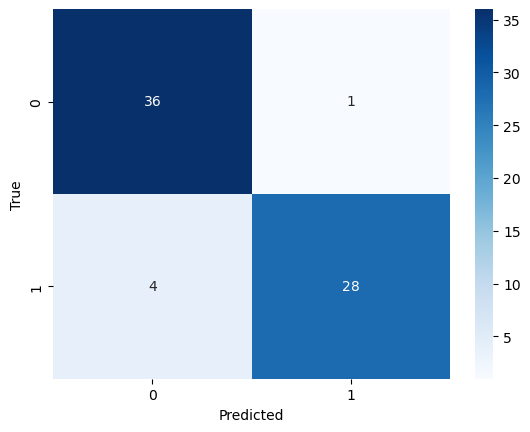

In [22]:
# create a heatmap for the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, cmap='Blues')
plt.show()


<p> Using the Seaborn library to visualise the confusion matrix of true and predicted variables.</p>

In [23]:
# get the TP, TN, FP, FN
TP = x2.iloc[0,0]
TN = x2.iloc[1,1]
FP = x2.iloc[1,0]
FN = x2.iloc[0,1]
print("TP: ", TP)
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)

TP:  36
TN:  28
FP:  4
FN:  1


In [24]:
# calcuate the precision, recall, f1-score and accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*(precision*recall)/(precision+recall)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)
print("Accuracy: ", accuracy)

Precision:  0.9
Recall:  0.972972972972973
F1-Score:  0.935064935064935
Accuracy:  0.927536231884058


<p> The code block above calculates the precision, recall, F1-score and accuracy of the Simplest Neighbour Algorithm using confusion matrix. </p>

### Euclidean Distance
<p> Euclidean Distance refers to the shortest points between two data points. It is the default distance measure used in K-Nearest Neighbour algorithm.

In [25]:
q =2 # euclidean distance
y_pred = nearest_neighbour(x_train, x_test, y_train, q)

<p> Simplest Neighbour Algorithm is taking the Euclidian Distance to measure the distance between the predictors and the target variables.</p>

In [26]:
print(y_pred)

[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


In [27]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])

In [28]:
print(x1)

    True  Predicted
0      1          1
1      0          0
2      0          0
3      1          1
4      1          1
..   ...        ...
64     0          0
65     0          0
66     1          0
67     0          0
68     1          1

[69 rows x 2 columns]


In [29]:
print(x2)

Predicted   0   1
True             
0          37   0
1          12  20


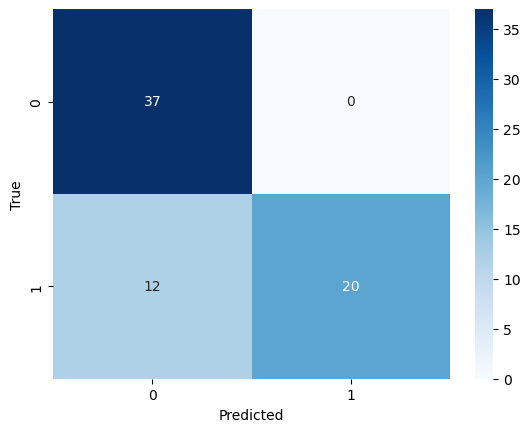

In [30]:
# create a heatmap for the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, cmap='Blues')
plt.show()

In [31]:
# get the TP, TN, FP, FN
TP = x2.iloc[0,0]
TN = x2.iloc[1,1]
FP = x2.iloc[1,0]
FN = x2.iloc[0,1]
print("TP: ", TP)
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)

TP:  37
TN:  20
FP:  12
FN:  0


In [32]:
# calcuate the precision, recall, f1-score and accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*(precision*recall)/(precision+recall)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)
print("Accuracy: ", accuracy)

Precision:  0.7551020408163265
Recall:  1.0
F1-Score:  0.8604651162790697
Accuracy:  0.8260869565217391


<p> The code block above calculates the precison, recall, F1-score and accuracy using the confusion matrix. The results are displayed above. </p>

# Part 1: B
***

### Calculate q from 1 - 20
<p> The next task was to measure the accuracy, precision, recall and f1-score based on q values from 1-20. Report the results in a chart and evaluate which of the q values lead to the best accuracy on the test set. </p>

In [33]:
# create a list to store values
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

<p> Creating a list for measuring the accuracy, precision, recall and f1-score metrics. </p>

In [34]:
for i in range(1,21):
    y_pred = nearest_neighbour(x_train, x_test, y_train, i)
    x1 = pd.DataFrame({'True': y_test, 'Predicted': y_pred})
    x2 = pd.crosstab(x1['True'], x1['Predicted'])
    # get the TP, TN, FP, FN
    TP = x2.iloc[0,0]
    TN = x2.iloc[1,1]
    FP = x2.iloc[1,0]
    FN = x2.iloc[0,1]
    # calcuate the precision, recall, f1-score and accuracy
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

<p> The code block above executes a for loop that goes through all the values of q from 1-20. On each iterations it calls over the nearest neighbour algorithm to get the predictions. It then creates a dataframe for storing the true and predicted labels. It also creates a confusion matrix using the crosstab function. After extracting the information from the confusion matrix it then calculates all the evaluation metrics. </p>

In [35]:
# crate a result table to store the values
result = pd.DataFrame({'q': range(1,21),'Accuracy': accuracy_list, 'Precision': precision_list, 'Recall': recall_list, 'F1-Score': f1_score_list})

<p> The result of the evaluation metrics is stored on a pandas dataframe with the corresponding variable names</p>

In [36]:
result

,q,Accuracy,Precision,Recall,F1-Score
0,1,0.927536,0.900000,0.972973,0.935065
1,2,0.826087,0.755102,1.000000,0.860465
2,3,0.869565,0.818182,0.972973,0.888889
3,4,0.753623,0.692308,0.972973,0.808989
4,5,0.782609,0.750000,0.891892,0.814815
5,6,0.739130,0.686275,0.945946,0.795455
6,7,0.724638,0.695652,0.864865,0.771084
7,8,0.695652,0.660000,0.891892,0.758621
8,9,0.637681,0.630435,0.783784,0.698795
9,10,0.666667,0.640000,0.864865,0.735632


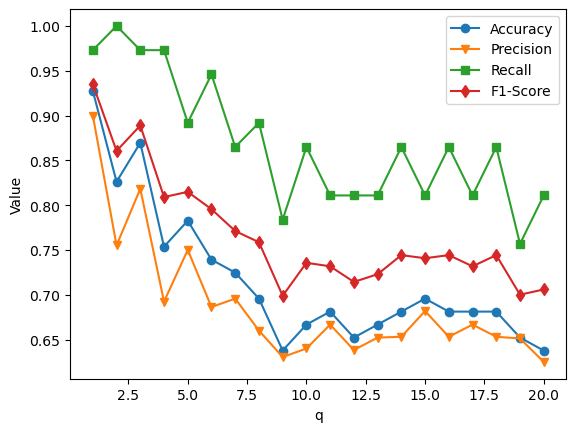

In [37]:
#plot the accuracy, precision, recall and f1-score against the value of p
import matplotlib.pyplot as plt
plt.plot(result['q'], result['Accuracy'], label='Accuracy', marker = 'o')
plt.plot(result['q'], result['Precision'], label='Precision',marker = 'v')
plt.plot(result['q'], result['Recall'], label='Recall', marker = 's')
plt.plot(result['q'], result['F1-Score'], label='F1-Score',marker = 'd')
plt.xlabel('q')
plt.ylabel('Value')
plt.legend()
plt.show()


### Summary
<p> The graph above displays the score on evaluation metrics based on the power of q from 1-20. We can clearly see that from the graph that as the amount of q increases the metrics rate decreases. This shows that the optimum power of q for the given task should be 1 which means the Minkowski Distance should be measured in Manhattan. The best accuracy throughout was 0.927536 which was achieved when power of q was 1. This pattern can also be observed with other metrics. </p>